In [1]:
!pip install pandas requests 
import requests #downloads zip file from webpage
import pandas as pd
import matplotlib.pyplot as plt
import zipfile #extracts csv from zip
import io #allows treat downloaded data as a file object

In [2]:
web = [#'https://s3.amazonaws.com/capitalbikeshare-data/2010-capitalbikeshare-tripdata.zip', 
       #'https://s3.amazonaws.com/capitalbikeshare-data/2011-capitalbikeshare-tripdata.zip', 
       #'https://s3.amazonaws.com/capitalbikeshare-data/2012-capitalbikeshare-tripdata.zip', 
       #'https://s3.amazonaws.com/capitalbikeshare-data/2013-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/2014-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/2015-capitalbikeshare-tripdata.zip', 
       #'https://s3.amazonaws.com/capitalbikeshare-data/2016-capitalbikeshare-tripdata.zip', 
       #'https://s3.amazonaws.com/capitalbikeshare-data/2017-capitalbikeshare-tripdata.zip', 
       #'https://s3.amazonaws.com/capitalbikeshare-data/201801-capitalbikeshare-tripdata.zip', 
       #'https://s3.amazonaws.com/capitalbikeshare-data/201802-capitalbikeshare-tripdata.zip', 
       #'https://s3.amazonaws.com/capitalbikeshare-data/201803-capitalbikeshare-tripdata.zip', 
       #'https://s3.amazonaws.com/capitalbikeshare-data/201804-capitalbikeshare-tripdata.zip', 
       #'https://s3.amazonaws.com/capitalbikeshare-data/201805-capitalbikeshare-tripdata.zip', 
       #'https://s3.amazonaws.com/capitalbikeshare-data/201806-capitalbikeshare-tripdata.zip', 
       #'https://s3.amazonaws.com/capitalbikeshare-data/201807-capitalbikeshare-tripdata.zip', 
       #'https://s3.amazonaws.com/capitalbikeshare-data/201808-capitalbikeshare-tripdata.zip', 
       #'https://s3.amazonaws.com/capitalbikeshare-data/201809-capitalbikeshare-tripdata.zip', 
       #'https://s3.amazonaws.com/capitalbikeshare-data/201810-capitalbikeshare-tripdata.zip', 
       #'https://s3.amazonaws.com/capitalbikeshare-data/201811-capitalbikeshare-tripdata.zip', 
       #'https://s3.amazonaws.com/capitalbikeshare-data/201812-capitalbikeshare-tripdata.zip', 
       #'https://s3.amazonaws.com/capitalbikeshare-data/201901-capitalbikeshare-tripdata.zip', 
       #'https://s3.amazonaws.com/capitalbikeshare-data/201902-capitalbikeshare-tripdata.zip', 
       #'https://s3.amazonaws.com/capitalbikeshare-data/201903-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/201904-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/201905-capitalbikeshare-tripdata.zip', 
       #'https://s3.amazonaws.com/capitalbikeshare-data/201906-capitalbikeshare-tripdata.zip', 
       #'https://s3.amazonaws.com/capitalbikeshare-data/201907-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/201908-capitalbikeshare-tripdata.zip', 
       #'https://s3.amazonaws.com/capitalbikeshare-data/201907-capitalbikeshare-tripdata.zip', 
       #'https://s3.amazonaws.com/capitalbikeshare-data/201908-capitalbikeshare-tripdata.zip', 
       #'https://s3.amazonaws.com/capitalbikeshare-data/201909-capitalbikeshare-tripdata.zip', 
      #'https://s3.amazonaws.com/capitalbikeshare-data/201910-capitalbikeshare-tripdata.zip', 
       #'https://s3.amazonaws.com/capitalbikeshare-data/201911-capitalbikeshare-tripdata.zip', 
       #'https://s3.amazonaws.com/capitalbikeshare-data/201912-capitalbikeshare-tripdata.zip', 
       #'https://s3.amazonaws.com/capitalbikeshare-data/202001-capitalbikeshare-tripdata.zip', 
       #'https://s3.amazonaws.com/capitalbikeshare-data/202002-capitalbikeshare-tripdata.zip', 
       #'https://s3.amazonaws.com/capitalbikeshare-data/202003-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202005-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202006-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202007-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202008-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202009-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202010-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202011-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202012-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202101-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202102-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202103-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202104-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202105-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202106-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202107-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202108-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202109-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202110-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202111-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202112-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202201-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202202-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202203-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202204-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202205-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202206-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202207-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202208-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202209-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202210-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202211-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202212-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202301-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202302-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202303-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202304-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202305-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202306-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202307-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202308-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202309-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202310-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202311-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202312-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202401-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202402-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202403-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202404-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202405-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202406-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202407-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202408-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202409-capitalbikeshare-tripdata.zip']
#commented first files that didn't have the same set of columns       
df_list = [] #adding each file as a dataframe to a list

In [3]:
for url in web:
    response = requests.get(url) #downloaded zip file from web
    if response.status_code == 200:
        with zipfile.ZipFile(io.BytesIO(response.content)) as zip_file: #extracting the data
            for filename in zip_file.namelist():
                #if filename.endwith('.csv'):
                with zip_file.open(filename) as f:
                    df_1 = pd.read_csv(f, encoding='ISO-8859-1', low_memory=False) # there was some error in the columns (missmatch of value types)
                    df_list.append(df_1)
    else:
        print(f'Failed to download the ZIP file from {url} . Status code ', response.status_code)
df = pd.concat(df_list, ignore_index = True)
print(df)

                   ride_id  rideable_type               started_at  \
0         946D42AD89539210    docked_bike      2020-05-30 17:25:29   
1         CC46FAAB662B8613    docked_bike      2020-05-09 14:42:04   
2         72F00B2FB833D6ED    docked_bike      2020-05-24 17:27:19   
3         4DFBE6AED989DF35    docked_bike      2020-05-27 15:29:52   
4         1AAFE6B4331AB9DF    docked_bike      2020-05-31 14:06:03   
...                    ...            ...                      ...   
16806985  F31B396C09CDD810  electric_bike  2024-09-20 17:46:58.160   
16806986  9C23F7E54E1CF3E1  electric_bike  2024-09-05 08:17:10.955   
16806987  F5E8A00116A10F7E  electric_bike  2024-09-07 12:04:43.149   
16806988  ADD3FAAFC4857150  electric_bike  2024-09-07 09:35:47.209   
16806989  1138BE2D338D3EB5  electric_bike  2024-09-07 15:49:48.494   

                         ended_at  \
0             2020-05-31 18:25:22   
1             2020-05-09 15:06:33   
2             2020-05-24 17:43:51   
3          

In [4]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,946D42AD89539210,docked_bike,2020-05-30 17:25:29,2020-05-31 18:25:22,Anacostia Library,31804,11th & H St NE,31614.0,38.865784,-76.978400,38.899983,-76.991383,casual,NaN,NaN,NaN
1,CC46FAAB662B8613,docked_bike,2020-05-09 14:42:04,2020-05-09 15:06:33,10th & E St NW,31256,21st St & Constitution Ave NW,31261.0,38.895914,-77.026064,38.892459,-77.046567,member,NaN,NaN,NaN
2,72F00B2FB833D6ED,docked_bike,2020-05-24 17:27:19,2020-05-24 17:43:51,Connecticut Ave & Newark St NW / Cleveland Park,31305,12th & U St NW,31268.0,38.934267,-77.057979,38.916787,-77.028139,member,NaN,NaN,NaN
3,4DFBE6AED989DF35,docked_bike,2020-05-27 15:29:52,2020-05-27 15:47:13,Connecticut Ave & Newark St NW / Cleveland Park,31305,14th & Belmont St NW,31119.0,38.934267,-77.057979,38.921074,-77.031887,casual,NaN,NaN,NaN
4,1AAFE6B4331AB9DF,docked_bike,2020-05-31 14:06:03,2020-05-31 14:30:30,Georgia Ave & Morton St NW,31419,17th & K St NW,31213.0,38.932128,-77.023500,38.902760,-77.038630,casual,NaN,NaN,NaN


In [5]:
df['Unnamed: 0'].describe()

count                   9
unique                  1
top       #mËx.Oé TìG
freq                    9
Name: Unnamed: 0, dtype: object

In [6]:
#idk what those last columns are about, probably can just delete
df = df.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'], axis=1)

In [7]:
df['Date Start'] = pd.to_datetime(df['started_at'], format='ISO8601').dt.date
df['Time Start'] = pd.to_datetime(df['started_at'], format='ISO8601').dt.time
df['Year'] = pd.to_datetime(df['started_at'], format='ISO8601').dt.year
df['Date End'] = pd.to_datetime(df['ended_at'], format='ISO8601').dt.date
df['Time End'] = pd.to_datetime(df['ended_at'], format='ISO8601').dt.time
df['Year'] = pd.to_datetime(df['ended_at'], format='ISO8601').dt.year
df['Ride Lenth'] = pd.to_datetime(df['ended_at'], format='ISO8601') - pd.to_datetime(df['started_at'], format='ISO8601')
df['Date Start'] = pd.to_datetime(df['started_at'], format='ISO8601').dt.day_name()
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Date Start,Time Start,Year,Date End,Time End,Ride Lenth
0,946D42AD89539210,docked_bike,2020-05-30 17:25:29,2020-05-31 18:25:22,Anacostia Library,31804,11th & H St NE,31614.0,38.865784,-76.978400,38.899983,-76.991383,casual,Saturday,17:25:29,2020.0,2020-05-31,18:25:22,1 days 00:59:53
1,CC46FAAB662B8613,docked_bike,2020-05-09 14:42:04,2020-05-09 15:06:33,10th & E St NW,31256,21st St & Constitution Ave NW,31261.0,38.895914,-77.026064,38.892459,-77.046567,member,Saturday,14:42:04,2020.0,2020-05-09,15:06:33,0 days 00:24:29
2,72F00B2FB833D6ED,docked_bike,2020-05-24 17:27:19,2020-05-24 17:43:51,Connecticut Ave & Newark St NW / Cleveland Park,31305,12th & U St NW,31268.0,38.934267,-77.057979,38.916787,-77.028139,member,Sunday,17:27:19,2020.0,2020-05-24,17:43:51,0 days 00:16:32
3,4DFBE6AED989DF35,docked_bike,2020-05-27 15:29:52,2020-05-27 15:47:13,Connecticut Ave & Newark St NW / Cleveland Park,31305,14th & Belmont St NW,31119.0,38.934267,-77.057979,38.921074,-77.031887,casual,Wednesday,15:29:52,2020.0,2020-05-27,15:47:13,0 days 00:17:21
4,1AAFE6B4331AB9DF,docked_bike,2020-05-31 14:06:03,2020-05-31 14:30:30,Georgia Ave & Morton St NW,31419,17th & K St NW,31213.0,38.932128,-77.023500,38.902760,-77.038630,casual,Sunday,14:06:03,2020.0,2020-05-31,14:30:30,0 days 00:24:27


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16806990 entries, 0 to 16806989
Data columns (total 19 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          object         
 3   ended_at            object         
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       object         
 13  Date Start          object         
 14  Time Start          object         
 15  Year                float64        
 16  Date End            object         
 17  Time End            object         
 18  Ride Lenth          timedelta64[ns]
dtypes: float64(5), obje

In [9]:
df.isnull().sum()

ride_id                     9
rideable_type               9
started_at                  9
ended_at                    9
start_station_name    1645379
start_station_id      1645379
end_station_name      1758665
end_station_id        1759409
start_lat                  19
start_lng                  19
end_lat                 26427
end_lng                 26427
member_casual               9
Date Start                  9
Time Start                  9
Year                        9
Date End                    9
Time End                    9
Ride Lenth                  9
dtype: int64

### Questions for the project
* Using GIS mapping I want to see if there are any uncovered areas. This will allow us to see if the company can expand more in the area.
* What type of bicycle is the most popular? Is the trend for bicycle type changing more towards electric bikes ? – This will allow us to see if more charging stations are needed or if classic bikes are more popular we can recommend reduction of investments on more expensive electric bikes.
* Are some stations more popular among casual drivers and some among members? If so, what can be the cause – missing public transport, more tourists in a particular area, etc.
* What time is the most popular for biking? This will allow us to give recommendations for marketing department and possibly create special rates depending on time. 
* Do members tend to have longer drives than casual drivers? If so, what type brings more money so we can promote a particular type.

#### Question #1: What type of bicycle is the most popular? Is the trend for bicycle type changing more towards electric bikes ? – This will allow us to see if more charging stations are needed or if classic bikes are more popular we can recommend reduction of investments on more expensive electric bikes.


In [10]:
df['rideable_type'].unique()

array(['docked_bike', nan, 'electric_bike', 'classic_bike',
       'electric_scooter'], dtype=object)

C:\Users\kazak\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


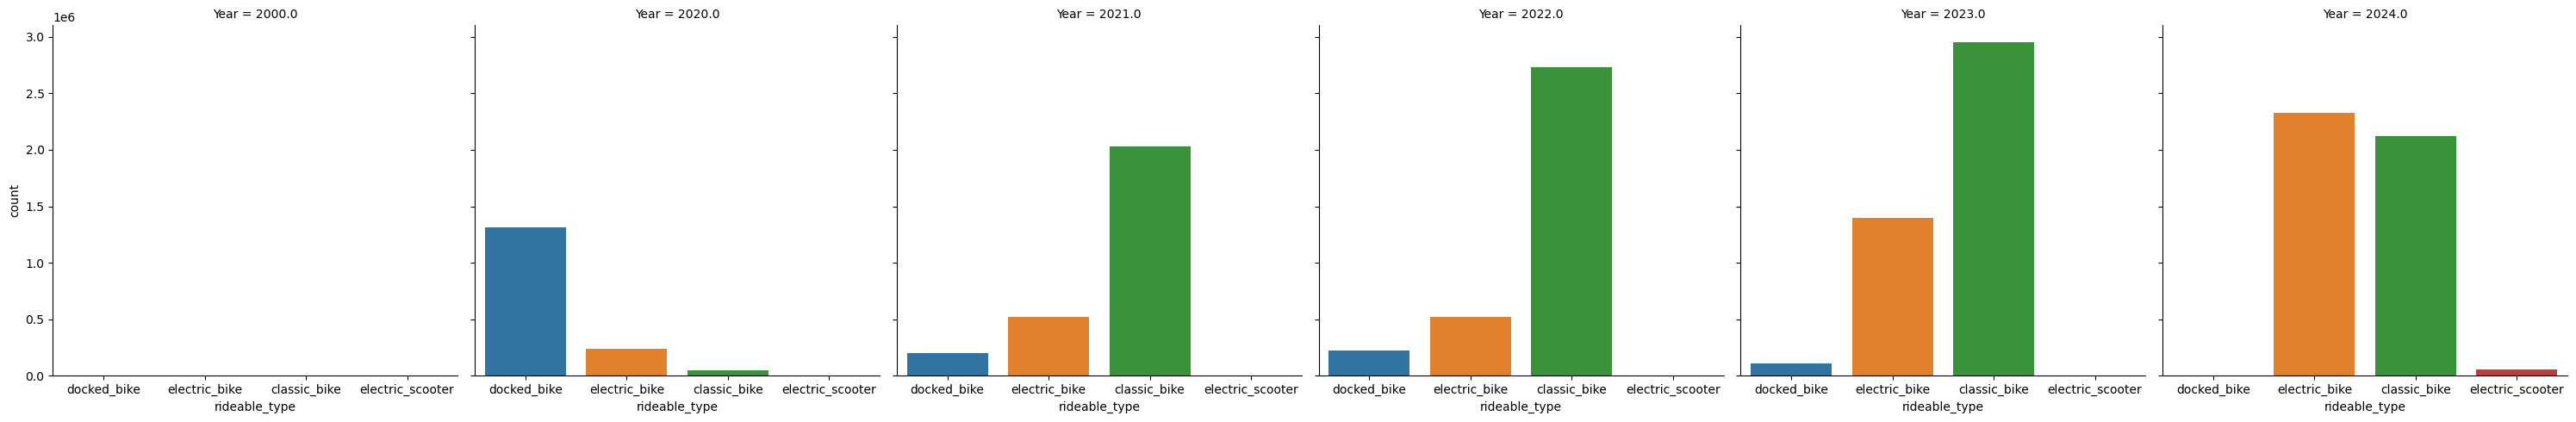

In [11]:
import seaborn as sns
sns.catplot(x ='rideable_type', data = df, kind = 'count', col = 'Year')
plt.show()

#### Conclusion: 
Classic bikes were the most popular type of bikes for rent at Capital Bikeshare in 2021 - 2023. However already in 2024 we can see that electric bikes become more popular than classic ones. At the same time popularity of docked bikes dicreased over the years. Introduciton of electric scooters and increasing popularity of electric bikes show that users that rent bikes tend to prefer renting 'non traditional', electric transportation types. 